# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
colors = ['black','blue','red','green','skyblue','yellow']
min_samples = 30
max_dist = 1
def absolute(n, data, max_dist):
    used1 = np.zeros(n, dtype=bool)
    mert = np.zeros(n, dtype=int)
    for i in range(n):
        dist_sq = np.sum((data[i] - data) ** 2, axis=1)
        max_dist_sq = max_dist ** 2
        neighbors_mask = (dist_sq <= max_dist_sq) & (np.arange(n) != i)
        
        mert[i] = np.sum(neighbors_mask)
        
        if mert[i] >= 30:
            neighbor_indices = np.where(neighbors_mask)[0]
            for j in neighbor_indices:
                used1[j] = True
    
    return mert, used1

def DBSCAN(data, index):
    global clast, cnt, n,mert
    queue = []
    
    if (mert[index] < 30):
        clast[index] = -1
        return

    used = np.zeros(n, dtype=bool)
    used[index] = True
    dist_sq = np.sum((data[index] - data) ** 2, axis=1)
    max_dist_sq = max_dist ** 2

    initial_neighbors = np.where((dist_sq <= max_dist_sq) & (np.arange(n) != index))[0]

    from collections import deque
    queue = deque(initial_neighbors)
    queue.append(index)
    for idx in initial_neighbors:
        used[idx] = True
    
    i = 0
    
    while queue:
        current = queue.popleft()
        clast[current] = cnt
        dist_sq_current = np.sum((data[current] - data) ** 2, axis=1)

        condition_mask = (
            (dist_sq_current <= max_dist_sq) & 
            (np.arange(n) != current) & 
            (clast == 0) & 
            (~used) & 
            (np.array(used1))
        )
        
        new_neighbors = np.where(condition_mask)[0]
        
        for j in new_neighbors:
            queue.append(j)
            used[j] = True
    
    cnt += 1




def DBSCAN1():
    global clast
    for i in range(n):
        if (clast[i] == 0):
            DBSCAN(data,i)
    for i in range(n):
        if (clast[i] == -1):
            clast[i] = 0



def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(1,n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='euclidean')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances



def draw(clast,colors,super_central,central_points,min_distances,df,n_clusters):
    plt.figure(figsize=(12,8))
    cluster_points = df[clast == 0]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[0], alpha=0.6, s=50,label='Шум')
    for i in range(1,n_clusters):
        cluster_points = df[clast == i]
        plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
    for i, (point, dist) in enumerate(zip(central_points, min_distances)):
        plt.scatter(point[0], point[1], 
                    color=colors[i + 1], s=150,edgecolor='black', linewidth=1.5,
                    label=f'Центральная точка кластера {i}')
    plt.scatter(super_central[0],super_central[1],color='purple',s=150,edgecolor='black', linewidth=1.5,label=f'Усредненный центр')
    plt.title('DBSCAN')
    plt.xlabel("X координата", fontsize=12)
    plt.ylabel("Y координата", fontsize=12)
    plt.grid(True,alpha=0.3)
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), 
            fontsize=9, framealpha=0.9, title='Центры кластеров',
            title_fontsize=10)
    plt.tight_layout()
    plt.show()



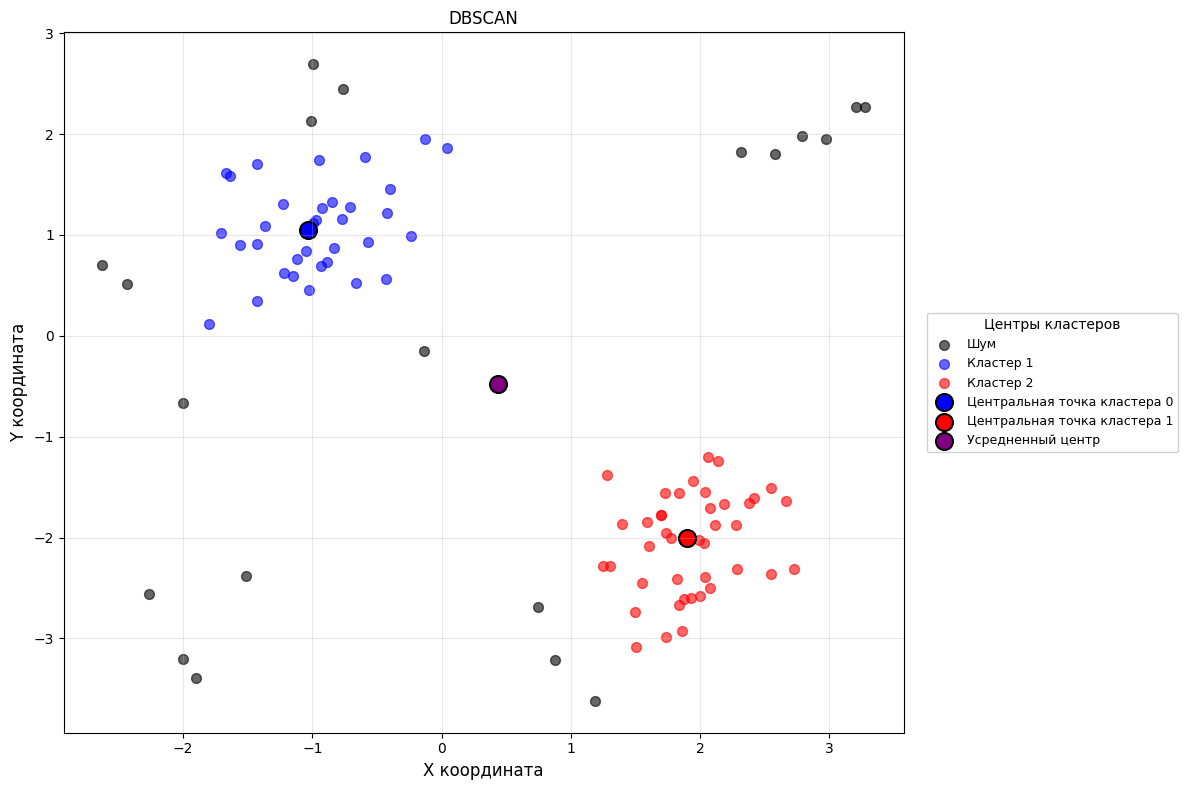

[ 43546.93216065 -48187.6970955 ]


In [2]:
#Файл 0.xls обработаем вручную как мы чувствуем(человеческий фактор) , а далее все дата-сеты обрабортаем с помощью самописного DBSCANA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE-2/0.xls")
data = df.iloc[:,:2].values
n = len(df)
clast = np.zeros(len(df))
cords1 = [-2,0,0.1,2]
cords2 = [1,-3.5,3,-1]
for i in range(n):
    if (cords1[0] <= data[i][0] and cords1[2] >= data[i][0] and cords1[1] <= data[i][1] and cords1[3] >= data[i][1]):
        clast[i] = 1
    elif (cords2[0] <= data[i][0] and cords2[2] >= data[i][0] and cords2[1] <= data[i][1] and cords2[3] >= data[i][1]):
        clast[i] = 2


n_clusters = 3
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)


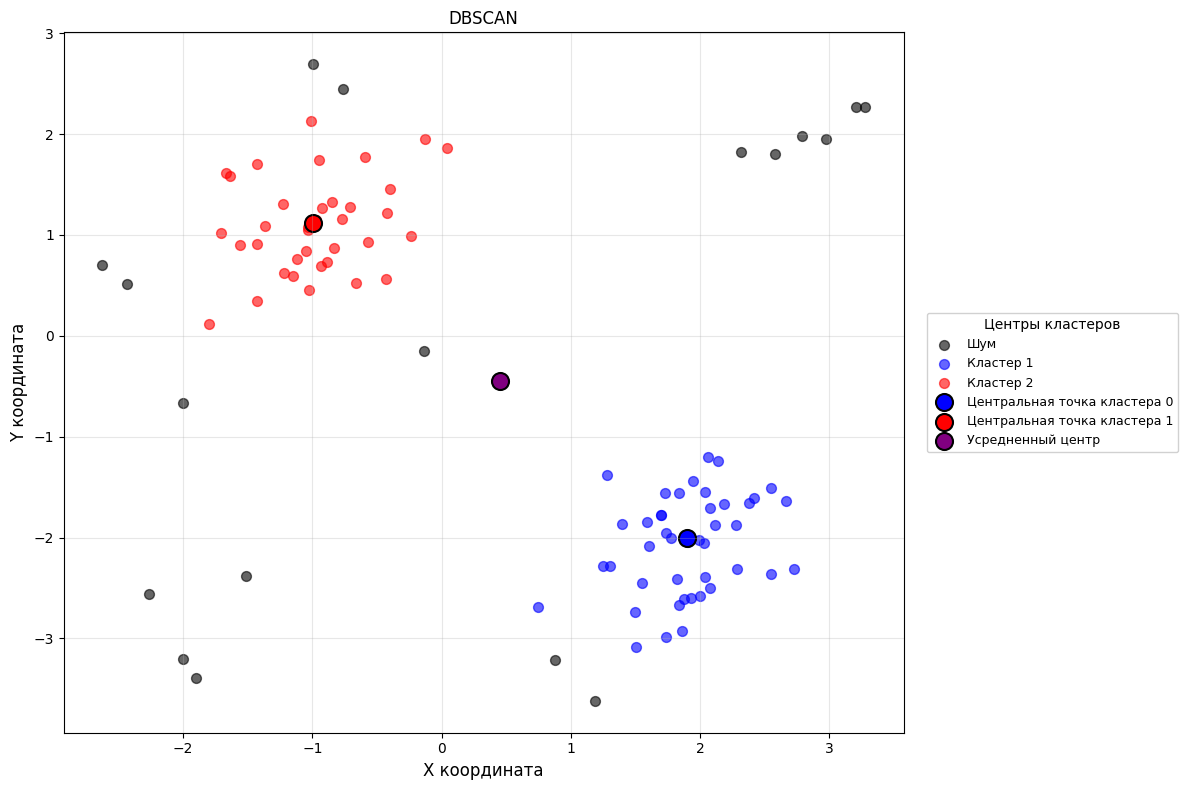

[ 45373.47332211 -44683.32236292]


In [3]:
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE-2/0.xls")
data = df.iloc[:,:2].values
n = len(df)
cnt = 1
clast = np.zeros(len(df))
mert,used1 = absolute(n,data,max_dist)
DBSCAN1()
n_clusters = cnt
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)

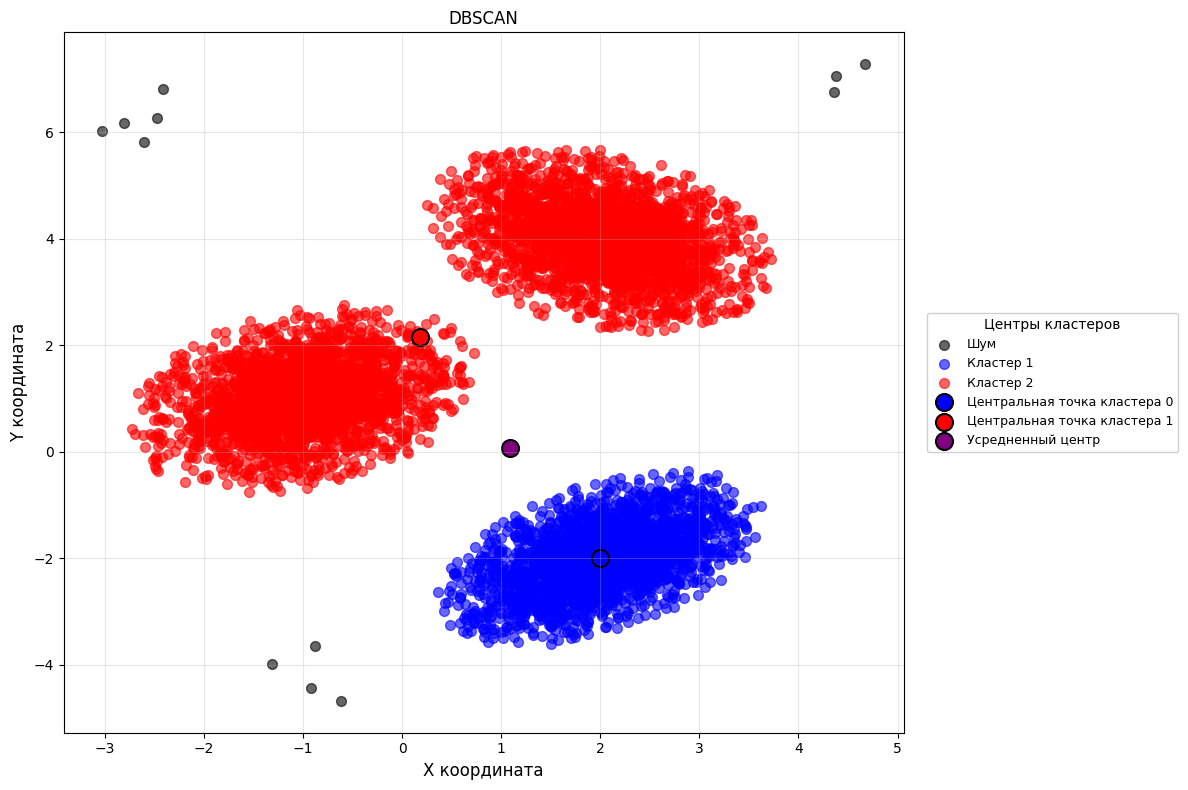

[108874.40688893   7612.20537241]


In [4]:
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE-2/1.xls")
data = df.iloc[:,:2].values
n = len(df)
cnt = 1
clast = np.zeros(n)
mert,used1 = absolute(n,data,max_dist)
DBSCAN1()
n_clusters = cnt
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)


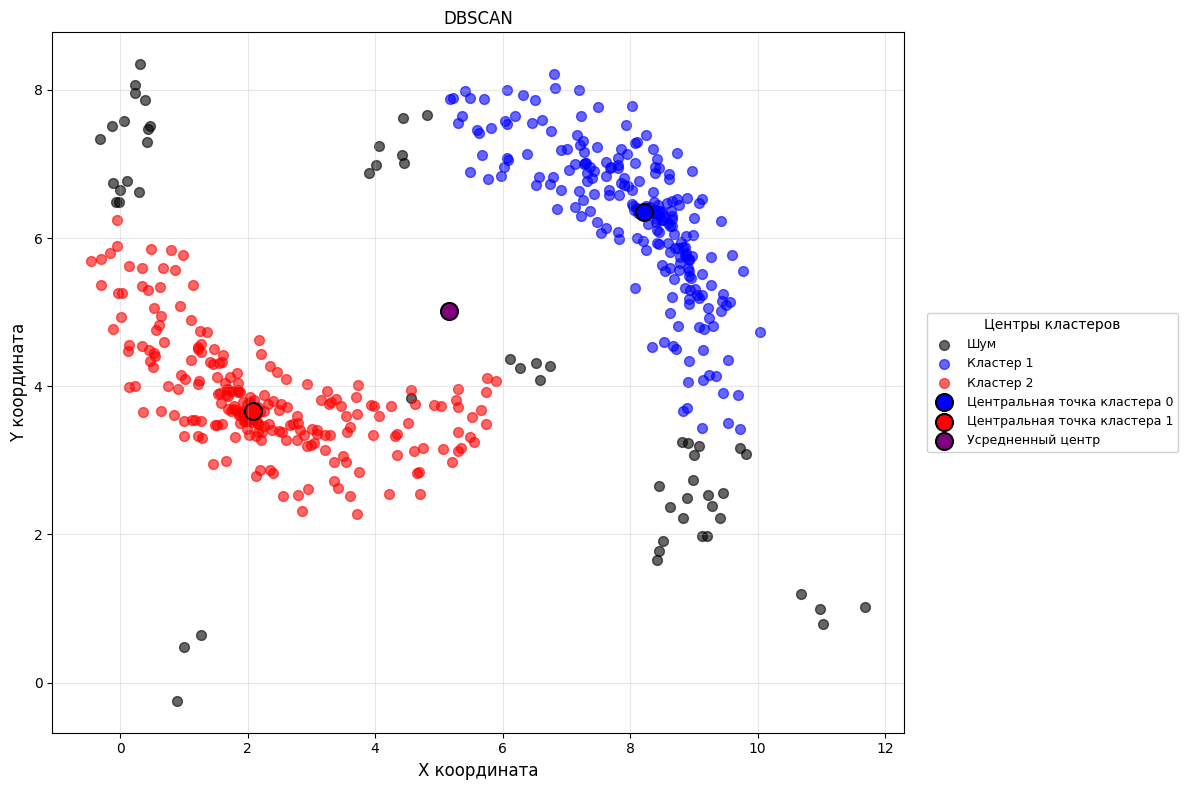

[515888.41082328 501031.9689866 ]


In [5]:
df = pd.read_csv("/Users/maksimdundin/Downloads/EGE-2/2.txt")
data = df.iloc[:,:2].values
n = len(df)
cnt = 1
clast = np.zeros(n)
mert,used1 = absolute(n,data,max_dist)
DBSCAN1()
n_clusters = cnt
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)

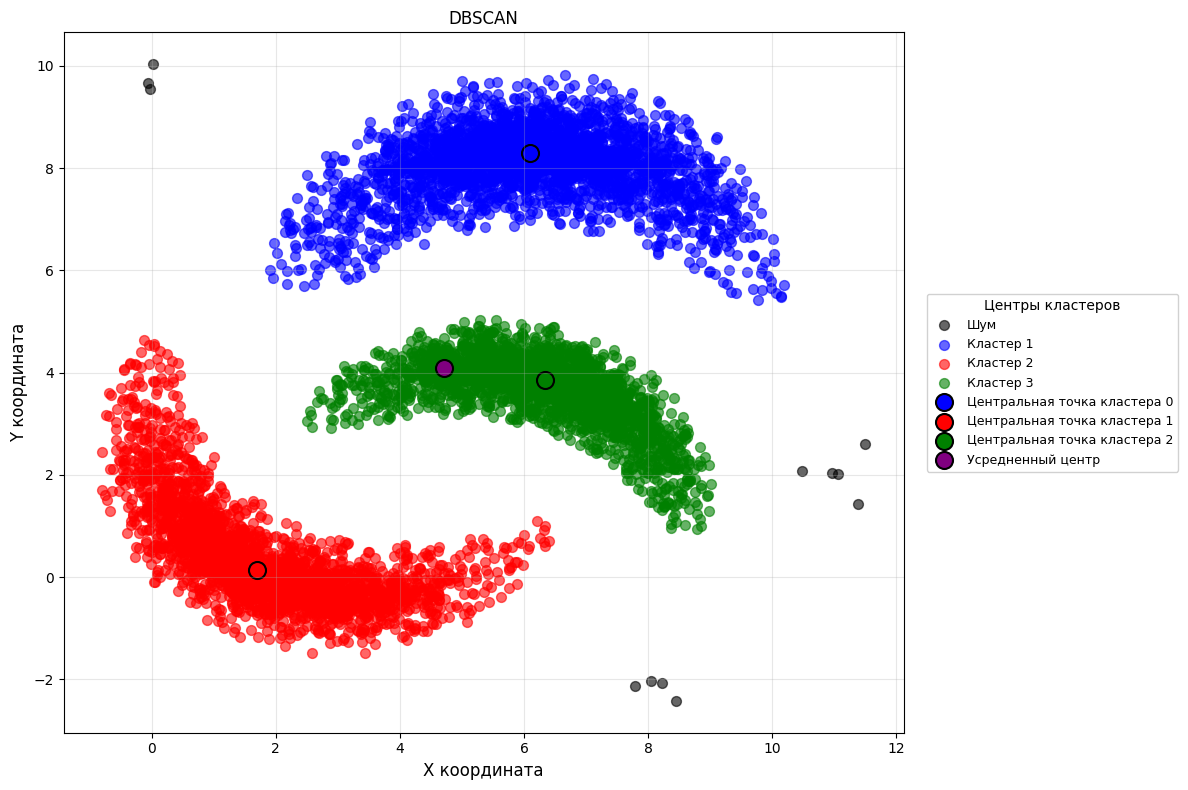

[471077.27431452 409201.51471019]


In [6]:
df = pd.read_csv("/Users/maksimdundin/Downloads/EGE-2/3.txt")
data = df.iloc[:,:2].values
n = len(df)
cnt = 1
clast = np.zeros(n)
mert,used1 = absolute(n,data,max_dist)
DBSCAN1()
n_clusters = cnt
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)

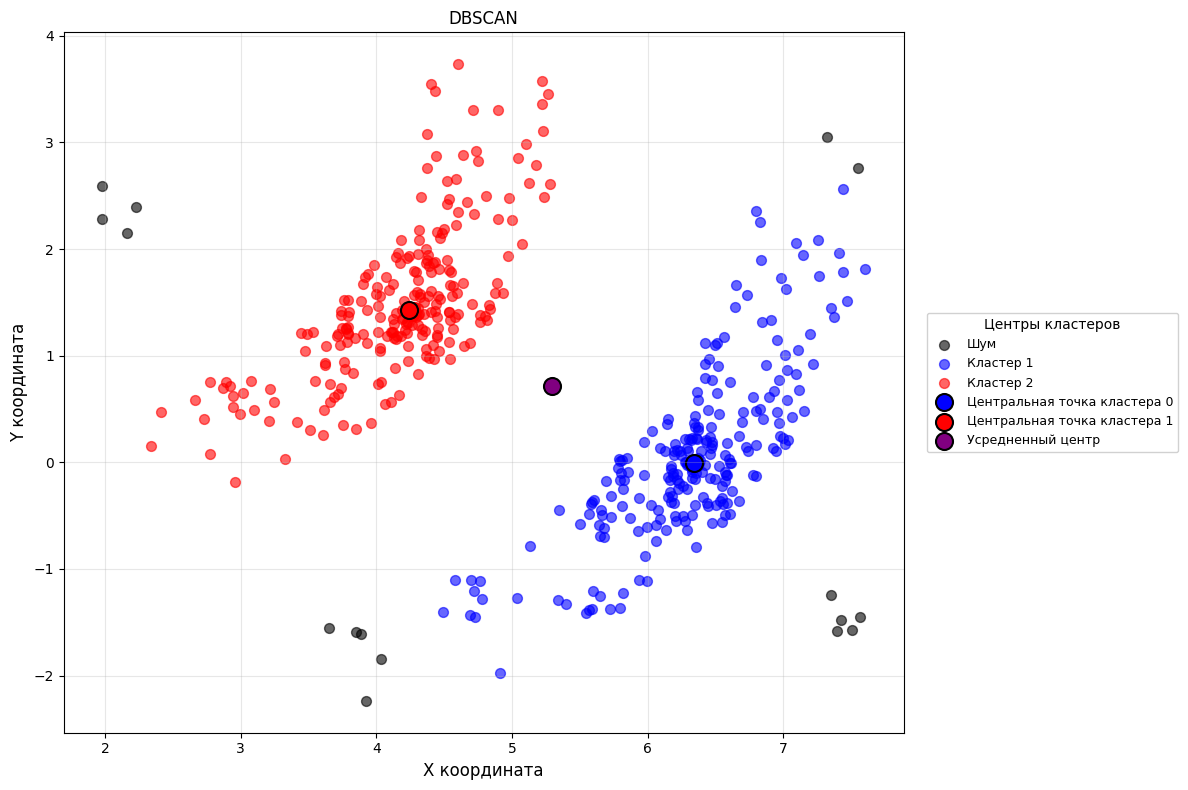

[529507.4723606   71263.80974183]


In [7]:
df = pd.read_csv("/Users/maksimdundin/Downloads/EGE-2/4.txt")
data = df.iloc[:,:2].values
n = len(df)
cnt = 1
clast = np.zeros(n)
mert,used1 = absolute(n,data,max_dist)
DBSCAN1()
n_clusters = cnt
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)

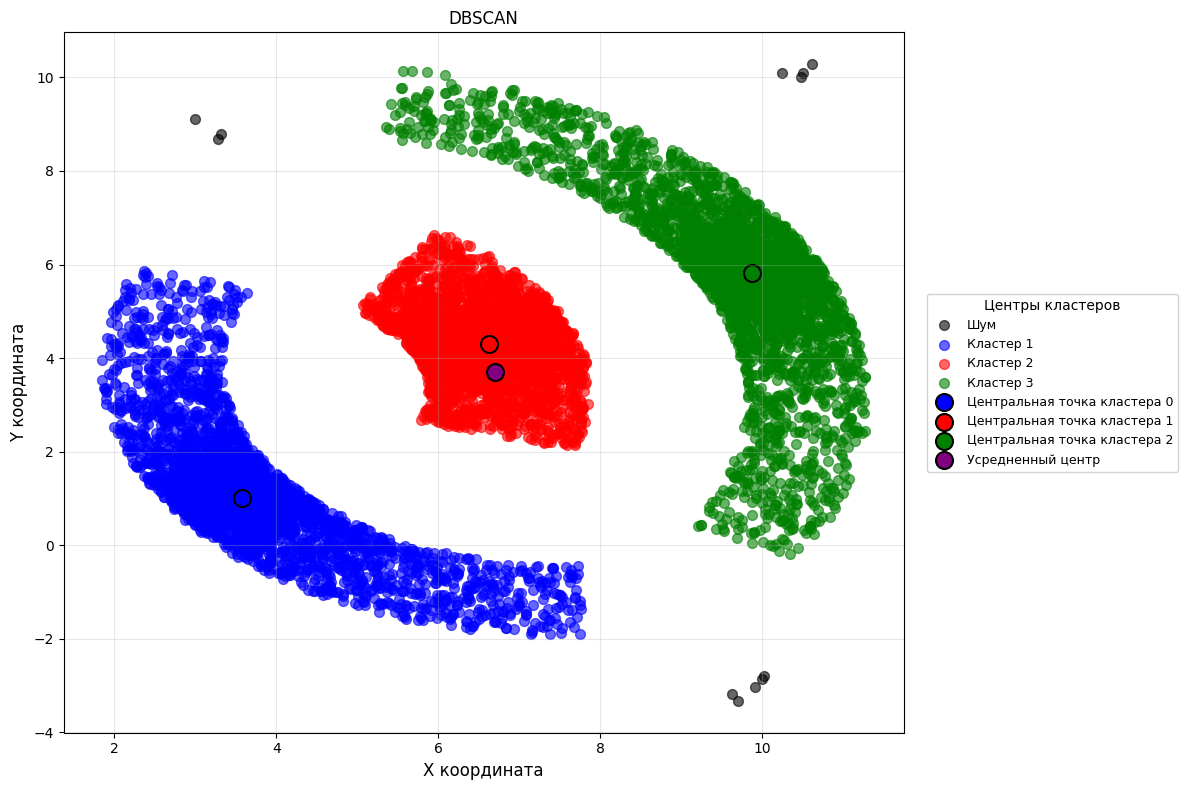

[669946.64900701 370701.47654221]


In [8]:
df = pd.read_csv("/Users/maksimdundin/Downloads/EGE-2/5.txt")
data = df.iloc[:,:2].values
n = len(df)
cnt = 1
clast = np.zeros(n)
mert,used1 = absolute(n,data,max_dist)
DBSCAN1()
n_clusters = cnt
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
super_central = np.mean(central_points,axis=0)
draw(clast,colors,super_central,central_points,min_distances,df,n_clusters)
super_central *= 100000
print(super_central)

# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

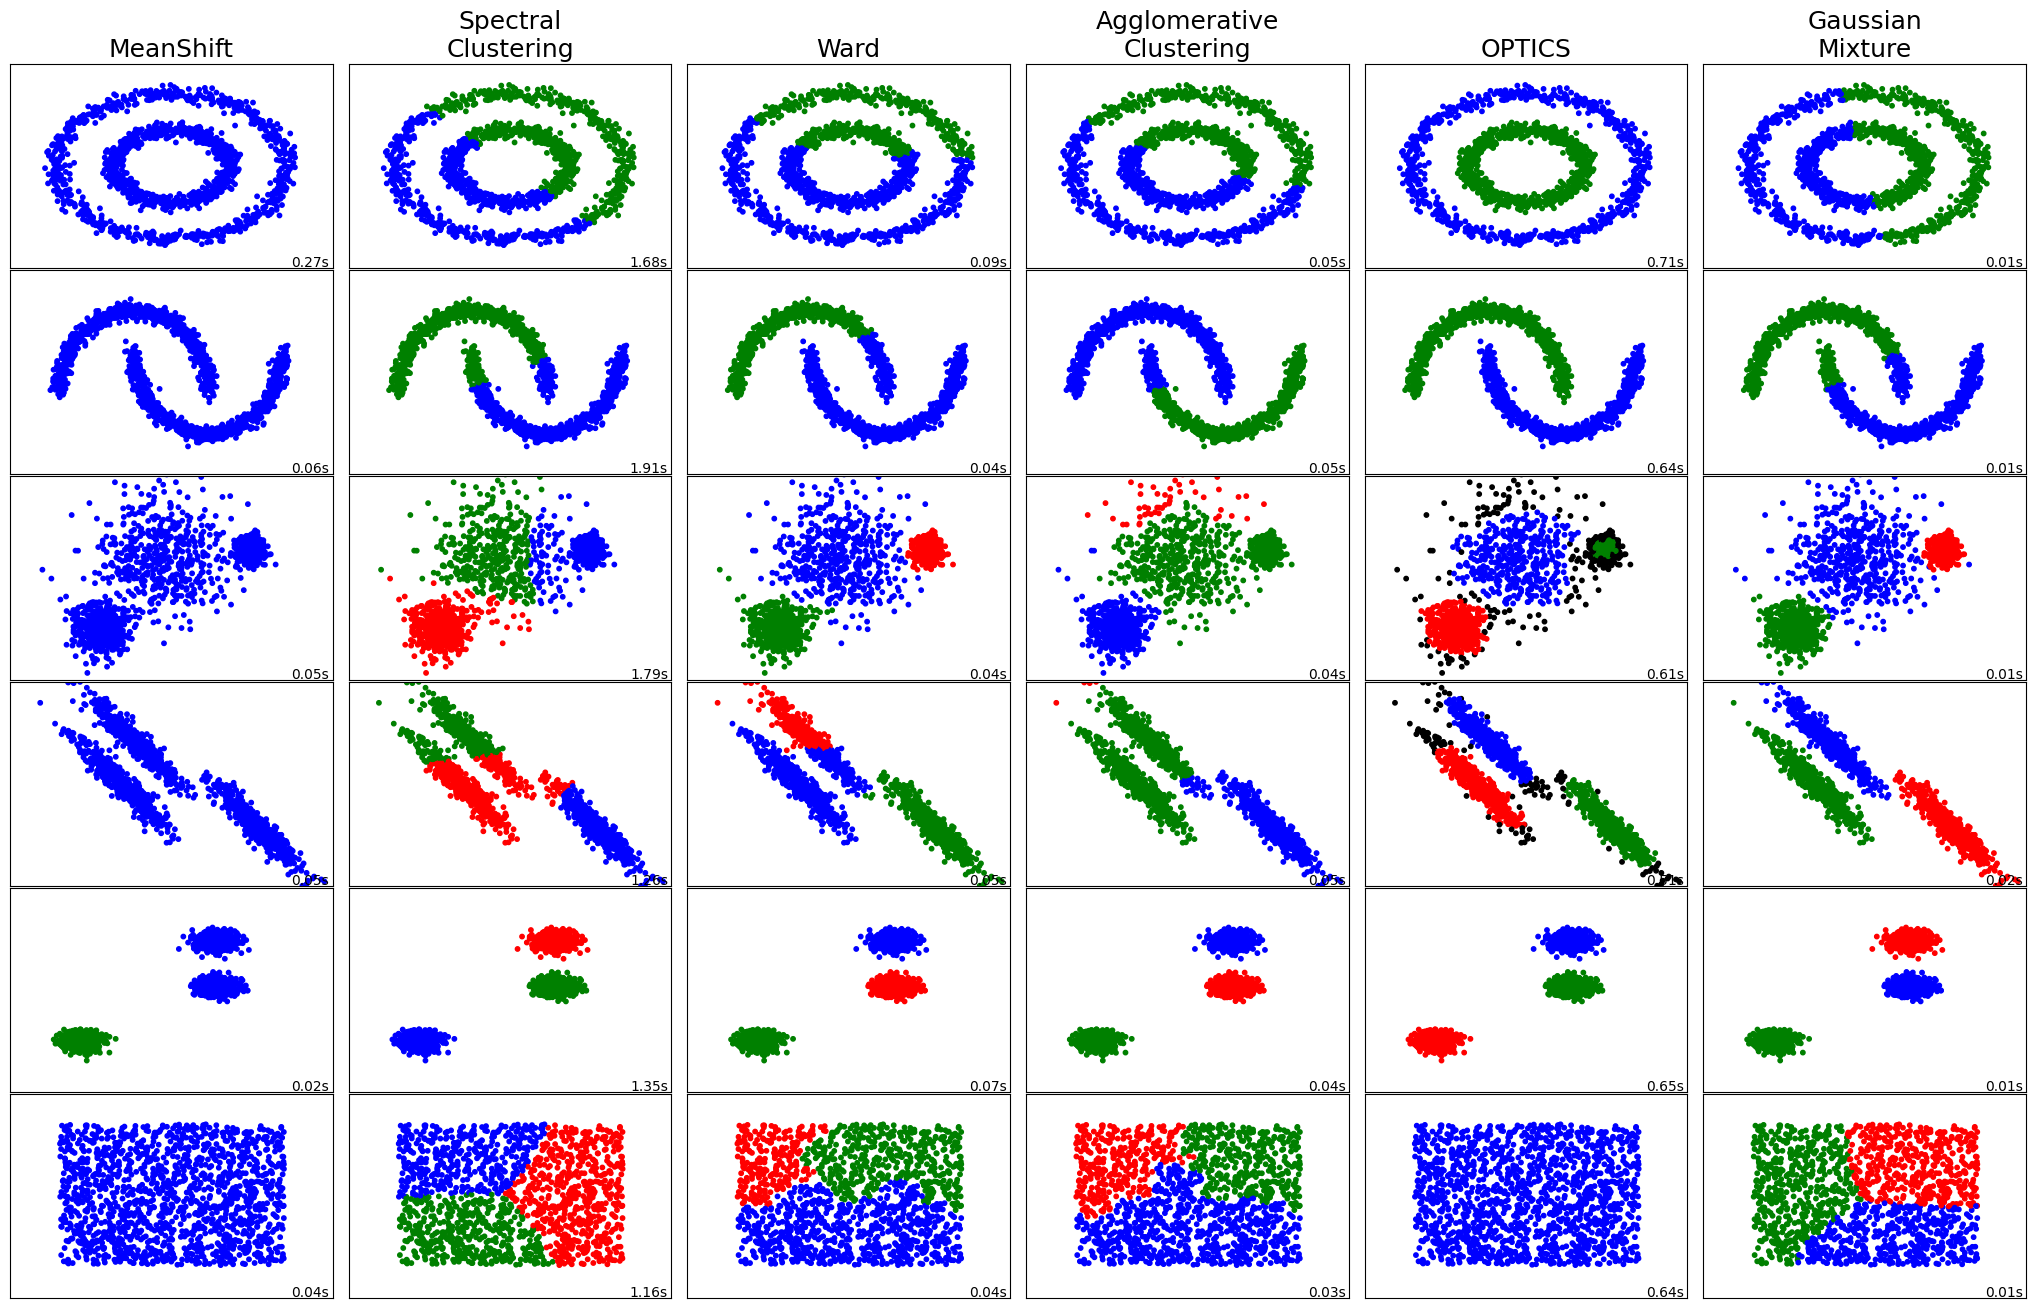

In [9]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.cluster import MeanShift, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import kneighbors_graph



np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    ms = MeanShift(bandwidth=params.get('bandwidth', 2), bin_seeding=True)
    

    gamma = params.get('gamma', 1.0)
    spectral = SpectralClustering(
        n_clusters=params['n_clusters'],
        n_neighbors=params['n_clusters'],
        affinity='rbf',
        assign_labels='kmeans',
        random_state=42
    )

    ward = AgglomerativeClustering(
        n_clusters=params['n_clusters'], 
        linkage='ward'
    )

    average_linkage = AgglomerativeClustering(
        n_clusters=params['n_clusters'], 
        linkage='average'
    )
    
    optics = OPTICS(
        min_samples=params['min_samples'], 
        xi=params['xi'], 
        min_cluster_size=params['min_cluster_size'],
        max_eps=params['eps']
    )

    gmm = GaussianMixture(
        n_components=params['n_clusters'], 
        random_state=42
    )
    clustering_algorithms = (
            ("MeanShift", ms),
            ("Spectral\nClustering", spectral),
            ("Ward", ward),
            ("Agglomerative\nClustering", average_linkage),
            ("OPTICS", optics),
            ("Gaussian\nMixture", gmm),
        )
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        
        colors = np.array(list(islice(cycle([
            'blue', 'green', 'red'
        ]), int(max(y_pred) + 1))))
        
        colors = np.append(colors, ["#000000"])
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plt.text(0.99, 0.01, f'{(t1-t0):.2f}s',
                transform=plt.gca().transAxes,
                horizontalalignment='right')
        
        if i_dataset == 0:
            plt.title(name, size=18)
        
        plot_num += 1

plt.show()
